# Univariate Analysis and Outliers

We will cover some of the fundamentals of describing data one variable at a time, called **univariate analysis**, and this knowledge will roll into dealing with outliers. 

Keep in mind that exploratory data analysis can be time-consuming especially as you go through each variable. Rabbit holes can frequently take you down paths that consume hours, even days or weeks, but for the sake of expediency we will show this process with a few variables we hypothesize are relevant for bird strikes. 

Let's start with bringing in the data from the last section. 

In [1]:
import pandas as pd 

df = pd.read_csv('birdstrike_section2.csv', index_col='INDEX_NR', parse_dates=["INCIDENT_DATE"])
with pd.option_context('display.max_columns', None):
  display(df)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708307,0,BUS,BUSINESS,PA-28,A,1.0,1.0,A,2015-05-22,2015,5,NaN,NaN,KVRB,VERO BEACH MUNICIPAL,FL,4,NaN,27.655560,27.655560,NaN,NaN,NaN,Approach,M,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
708308,1,BUS,BUSINESS,BE-1900,A,3.0,2.0,C,2015-06-18,2015,6,NaN,NaN,PAEN,KENAI MUNICIPAL ARPT,AK,NaN,NaN,60.572000,60.572000,NaN,NaN,NaN,Approach,M,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
708309,2,BUS,BUSINESS,PA-46 MALIBU,A,1.0,1.0,A,2015-09-20,2015,9,NaN,NaN,KDWH,DAVID WAYNE HOOKS MEMORIAL ARPT,TX,NaN,NaN,30.061860,30.061860,NaN,NaN,NaN,NaN,M,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
708310,3,DAL,DELTA AIR LINES,B-717-200,A,4.0,2.0,D,2015-11-07,2015,11,NaN,NaN,KSTL,LAMBERT-ST LOUIS INTL,MO,30R,NaN,38.747690,38.747690,NaN,NaN,2.0,Approach,M,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
708311,4,BUS,BUSINESS,BE-90 KING,A,2.0,2.0,C,2015-12-17,2015,12,NaN,NaN,KPMP,POMPANO BEACH AIRPARK,FL,15,NaN,26.247140,26.247140,0.0,NaN,0.0,Landing Roll,M,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516465,141064,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,2024-03-17,2024,3,NaN,0 days 07:15:00,KSEA,SEATTLE-TACOMA INTL,WA,16L,NaN,47.448980,47.448980,NaN,NaN,0.0,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,Z6007,American robin,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1516467,141065,EJA,NETJETS,CL-601/604,A,3.0,2.0,D,2024-03-17,2024,3,NaN,0 days 19:15:00,KHYI,SAN MARCOS MUNICIPAL ARPT,TX,8,NaN,29.893610,29.893610,2000.0,160.0,5.0,Approach,N,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,NaN,Some Cloud,NaN,ZT000,Meadowlarks,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1516468,141066,ASA,ALASKA AIRLINES,B-737-800,A,4.0,2.0,D,2024-03-17,2024,3,Day,0 days 16:39:00,KSBA,SANTA BARBARA MUNICIPAL,CA,NaN,NaN,34.426210,34.426210,30.0,NaN,0.0,Approach,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,ZT002,Western meadowlark,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Let's also take care of a few datatype conversions that do not get saved into the CSV. 

In [3]:
# Turn PHASE_OF_FLIGHT into a category
phase_of_flt = pd.CategoricalDtype(categories=['Parked', 'Taxi','Take-off Run', 'Approach', 'Departure', 'Climb', 'En Route',
                                               'Descent', 'Landing Roll', 'Arrival', 'Local'])

df["PHASE_OF_FLIGHT"] = df["PHASE_OF_FLIGHT"].astype(phase_of_flt)

# Turn TIME into timedelta type 
df["TIME"] = pd.to_timedelta(df["TIME"])

## Height Variable

Let's start with a few theories on some of the variables, perhaps that the `HEIGHT` variable (the altitude) might be relevant for whether or not bird strikes occurs. After all, birds need to land so they can eat and tend to their nests. We can call the `hist()` function on this column to create a histogram. 

<Axes: >

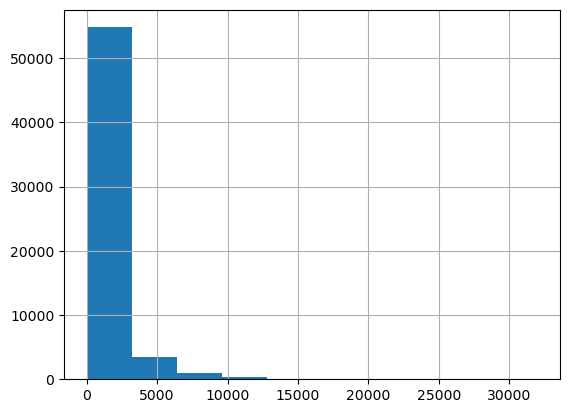

In [6]:
df["HEIGHT"].hist(bins=10)

Okay, that's interesting. It seems bird strikes heavily skew at lower altitudes. Let's increase the number of bins to see some more resolution. We do not want to have too many bins because we do not have an infinite amount of data, and we will encounter a diminishing return and then a loss of information. 

<Axes: >

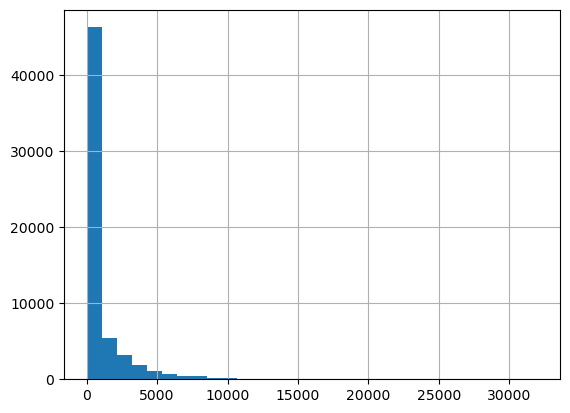

In [10]:
df["HEIGHT"].hist(bins=30)

Most bird strikes overwhelmingly happen below 1000 feet. This makes sense because birds, although frequently airborne, will largely fly close to the ground. Note you can also build a histogram directly with `matplotlib`. This allows us to bring in some more details into the graph, such as labeling the counts for each bar. 

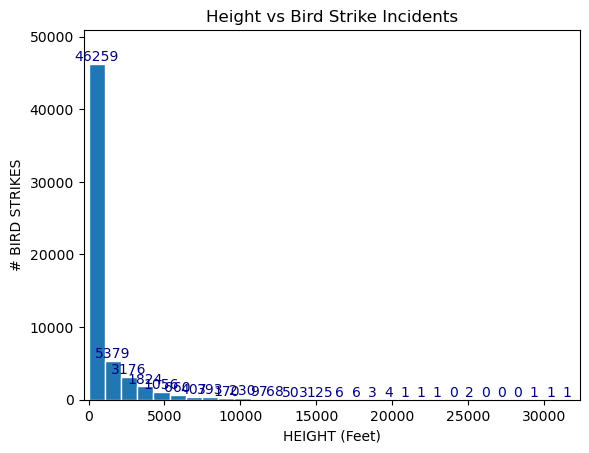

In [12]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

values, bins, bars = plt.hist(df['HEIGHT'], bins=30, edgecolor='white')
plt.xlabel("HEIGHT (Feet)")
plt.ylabel("# BIRD STRIKES")
plt.title('Height vs Bird Strike Incidents')
plt.bar_label(bars, fontsize=10, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()

You can detect a skew by comparing the **mean** (the average of the sample) and **median** (center-most value in the sample) of a given variable. If the two are very different, then we have a highly skewed variable which visually is apparent above. 

In [14]:
height_mean = df["HEIGHT"].mean()
height_median = df["HEIGHT"].median()

print(f"MEAN: {height_mean} MEDIAN: {height_median}")

MEAN: 905.5227394239123 MEDIAN: 50.0


On a sidenote, you can approximate the distribution using a [kernel density estimation (KDE)](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.density.html). 

<Axes: ylabel='Density'>

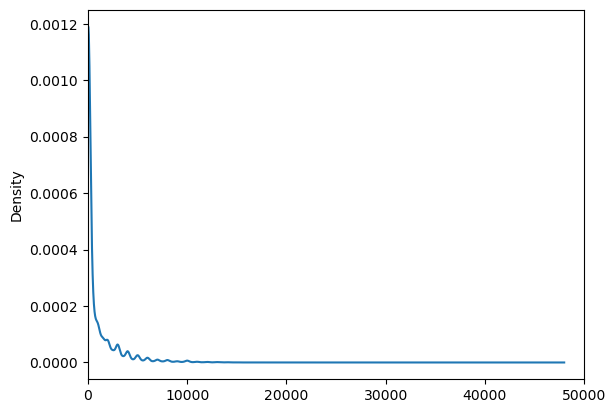

In [16]:
df["HEIGHT"].plot.kde(xlim=(0,50_000))

## Phase of Flight Variable

Related to the `HEIGHT`, let's look at the `PHASE_OF_FLIGHT`. For some context, here is a typical cycle visualizing the phases of flight. Note that depending on the aircraft and nature of the flight, some stages will be different. For example, an `EN ROUTE` is typical for a flight going from point A to point B. But if a pilot is practicing circuits in a plane (taking off and landing over and over again), this is called `LOCAL` as a local pattern is being flown. 

![](resource/7Od2TS0O.svg)

We should expect phases of flight that are closer to the ground to have more bird strikes, based on our previous variable analysis on `HEIGHT`. Let's take a look and plot the `value_counts()` as a bar chart. 

<Axes: xlabel='PHASE_OF_FLIGHT'>

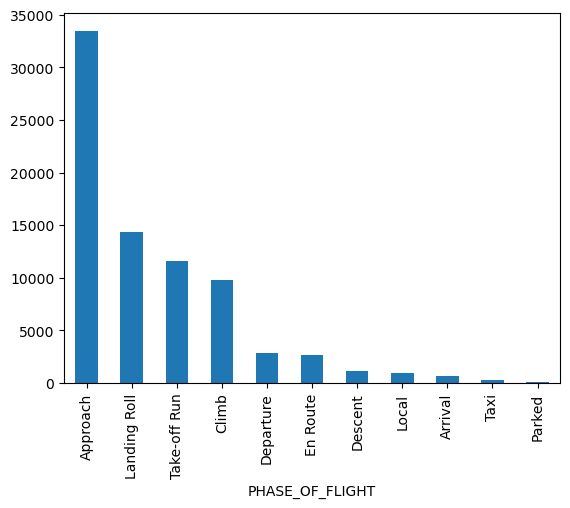

In [18]:
df["PHASE_OF_FLIGHT"].value_counts().plot.bar()

So there is nothing to surprising here. Phases of flight that are closer to the ground have more bird strikes. Since this variable is discrete, it might be useful to observe the **mode**, the most frequently occurring value(s). We can see that `Approach` is the mode, meaning that is the most common phase of flight for bird strikes. 

In [20]:
df["PHASE_OF_FLIGHT"].mode()

0    Approach
Name: PHASE_OF_FLIGHT, dtype: category
Categories (11, object): ['Parked', 'Taxi', 'Take-off Run', 'Approach', ..., 'Descent', 'Landing Roll', 'Arrival', 'Local']

## Speed Variable

Next let's take a look at `SPEED`. The faster a plane is going, the more likely the plane is going to be damaged colliding with a bird, hence resulting in a bird strike report. A bird that bumps into a slow-moving plane is less likely to count as a bird strike if no damage occurs, right? However, a spinning engine on a stationary aircraft can suck in a bird and certainly count as a bird strike too. 

Let's take a look. 

<Axes: >

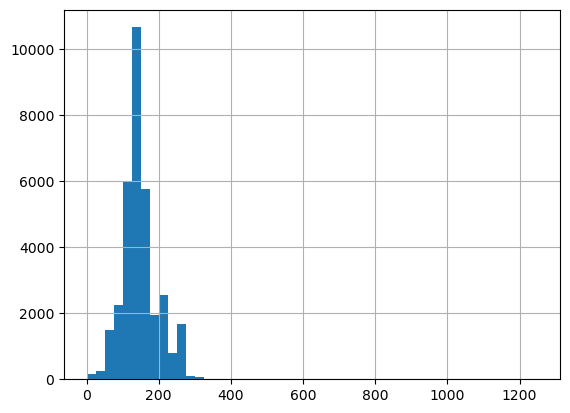

In [22]:
df["SPEED"].hist(bins=50)

We seem to have a normal distribution here as indicated by the bell curve shape, with some extreme outliers to the right. This is going to be interesting. Let's take the mean and median of this. 

In [24]:
speed_mean = df["SPEED"].mean()
speed_median = df["SPEED"].median()

print(f"MEAN: {speed_mean} MEDIAN: {speed_median}")

MEAN: 144.55767000683892 MEDIAN: 140.0


Sure enough, our mean is not very far from our median so we got a good-looking variable with some predictive value. And again, this might make sense. When an aircraft is moving slowly, it is not moving fast enough for a bird to hit in a damaging way (unless it gets sucked into an engine). If it is moving fast, it is likely at cruise altitude high and away from where birds are found. There might be a correlation even between speed and height which we will explore in the next section. 

For good measure, let's approximate the probability distribution. If we use speed for certain tasks, we might consider chopping off the outliers in that right tail. 

<Axes: ylabel='Density'>

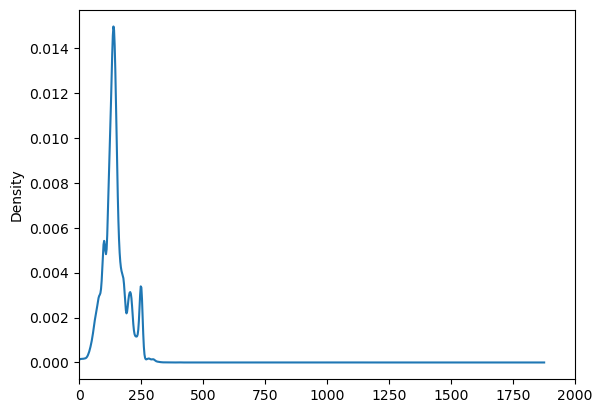

In [26]:
df["SPEED"].plot.kde(xlim=(0,2000))

## Outliers 

**Outliers** are values that are far away from most of the values in a distribution. How we deal with outliers depends on what we are trying to do and the context of the problem. We may remove them, replace them, or just leave them be depending on what the outlier means to the problem at hand.

While there are valid cases to remove outliers, just remember to ask what outliers mean in your application. Your smart thermostat may not need to learn from an unusually cold day in May, and that is an outlier you can safely consider removing. However, a pedestrian in a chicken costume disrupting a "self-driving" car's computer vision is a very serious issue, even if it is an outlier. We do not want to remove that as it indicates we have bigger problems with our domain. 

Outliers are a very difficult topic to get right and require not just an understanding of statistics, but also an understanding of the problem. Just keep that in mind!

### Interquartile Range (IQR) and Percentiles

Recall that a majority of bird strikes happened well before 10,000 feet, so this skews the data to the left heavily. 

<Axes: >

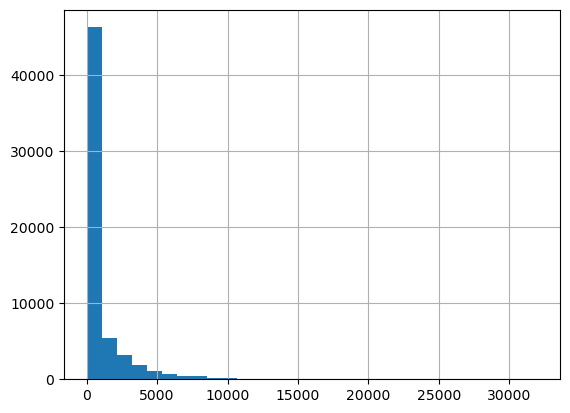

In [28]:
df["HEIGHT"].hist(bins=30)

Let's take a look at records where bird strikes exceeded that height and hypothesize those as outliers. 

In [30]:
with pd.option_context('display.max_columns', None):
    display(df[df["HEIGHT"] > 10_000])

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708327,18,NKS,SPIRIT AIRLINES,A-319,A,4.0,2.0,D,2015-05-10,2015,5,NaN,NaT,KORD,CHICAGO O'HARE INTL ARPT,IL,NaN,NaN,41.979600,41.979600,12000.0,NaN,NaN,Climb,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Precautionary Landing,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
765592,1221,SWA,SOUTHWEST AIRLINES,B-737-700,A,4.0,2.0,D,2015-02-26,2015,2,NaN,NaT,KSAN,SAN DIEGO INTL,CA,27,NaN,32.733560,32.733560,12000.0,280.0,90.0,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBS,Unknown bird - small,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
765903,1502,FDX,FEDEX EXPRESS,B-757-200,A,4.0,2.0,D,2015-03-25,2015,3,Night,0 days 06:05:00,KMDT,HARRISBURG INTL,PA,13,NaN,40.193500,40.193500,25000.0,325.0,75.0,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
766189,1751,SWA,SOUTHWEST AIRLINES,B-737-300,A,4.0,2.0,D,2015-03-14,2015,3,Night,0 days 21:35:00,KLAX,LOS ANGELES INTL,CA,24R,NaN,33.942540,33.942540,11000.0,220.0,35.0,Descent,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,Y9018,Western flycatcher,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
766333,1893,SWA,SOUTHWEST AIRLINES,B-737-700,A,4.0,2.0,D,2015-04-09,2015,4,Day,0 days 06:43:00,KMDW,CHICAGO MIDWAY INTL ARPT,IL,NaN,NaN,41.785980,41.785980,10300.0,260.0,NaN,Descent,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Overcast,NaN,UNKBM,Unknown bird - medium,Medium,False,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511813,139173,SWA,SOUTHWEST AIRLINES,B-737-8,A,4.0,2.0,D,2023-07-30,2023,7,Day,0 days 17:08:00,KBNA,NASHVILLE INTL,TN,NaN,NaN,36.124480,36.124480,12000.0,300.0,10.0,Climb,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKBM,Unknown bird - medium,Medium,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1513167,140021,UPS,UPS AIRLINES,B-767-300,A,4.0,2.0,D,2024-04-05,2024,4,Dusk,0 days 17:20:00,ZGSZ,SHENZHEN BAOAN INTL ARPT,FN,15,NaN,22.639258,22.639258,10800.0,220.0,10.0,Descent,N,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKBL,Unknown bird - large,Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1513178,140032,UAL,UNITED AIRLINES,B-737-900,A,4.0,2.0,D,2017-05-10,2017,5,Day,0 days 18:13:00,KIAH,GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT,TX,NaN,NaN,29.980470,29.980470,11000.0,NaN,15.0,Descent,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Okay, 325 rows is somewhat small amount compared to the whole dataset. While this goes into bivariate analysis, let's satiate our curiosity and ask what species of birds are capable of flying this high according to the data. 

In [32]:
df[df["HEIGHT"] > 10_000]["SPECIES"].value_counts(dropna=False)

SPECIES
Unknown bird                           99
Unknown bird - small                   61
Unknown bird - medium                  60
Unknown bird - large                   29
Swainson's thrush                       6
American robin                          5
Snow goose/Ross's goose complex         4
Unknown bird or bat                     4
Perching birds (y)                      4
Yellow-billed cuckoo                    3
Chimney swift                           3
Wilson's warbler                        2
Western flycatcher                      2
Western tanager                         2
White-/golden-crown sparrow complex     2
Northern shoveler                       2
Yellow-headed blackbird                 2
Canada goose                            2
Green-tailed towhee                     2
Cedar waxwing                           1
Turkey vulture                          1
Sora                                    1
Rock pigeon                             1
Dunlin                    

Okay, a lot of unknown birds and a lot of diversity with no clear pattern. Are there any birds flying above 25,000 feet? 

In [34]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[df["HEIGHT"] > 25_000])

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
780976,15230,FJC,FALCON JET CENTRE,UNKNOWN,NaN,NaN,NaN,NaN,2016-06-06,2016,6,Day,NaT,ZZZZ,UNKNOWN,NaN,NaN,Enroute,NaN,NaN,30000.0,300.0,NaN,En Route,NaN,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,NaN,Some Cloud,Rain,YI009,Cliff swallow,Small,True,NaN,NaN,NaN,NaN,NaN,NaN,False
1430985,117709,SWA,SOUTHWEST AIRLINES,B-737-700,A,4.0,2.0,D,2022-06-26,2022,6,Day,NaT,KDAL,DALLAS LOVE FIELD ARPT,TX,31R,NaN,32.84711,32.84711,29000.0,270.0,40.0,Climb,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBL,Unknown bird - large,Large,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1476144,128307,UAL,UNITED AIRLINES,B-737-900,A,4.0,2.0,D,2023-09-14,2023,9,Night,0 days 22:00:00,KGPI,GLACIER PARK INTL,MT,2/20,NaN,48.31140,48.31140,32000.0,541.0,NaN,Descent,N,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,ZS007,Wilson's warbler,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Interesting. We only had 3 instances where bird strikes occurred above 25,000 feet, including a "Cliff swallow" and a "Wilson's warber." Is it possible birds can fly this high? If we do some research, the greatest record of a bird collision was in [1973 when a vulture collided at 37,000 feet](https://sora.unm.edu/sites/default/files/journals/wilson/v086n04/p0461-p0462.pdf). 

Let's formalize our analysis a bit more. As we saw,`HEIGHT` is not one of those cases that follow the nice bell curve shape of the normal distribution. Another way we can approach outliers in these cases is to use the **Interquartile Range (IQR) method**. The **IQR** is the difference between the 75th and 25th percentile. When referring to the quarterly percentiles (0, 25, 50, 75, and 100), we refer to them as quartiles. A 50 percent quartile would be the middle-most value (the median), or the average of the two most-centered values.

A box plot  (also called a "box and whiskers plot") will visualize all of this quickly as shown below. 

<img src ="resource/8U7f1C6A.png" width="600"> </img>

The `1.5` value is known as $ k $, and we can increase it to raise the threshold for what we consider an *outlier*. The box plot will not only show the range of the data, but also show where most data gravitates towards and its skewness. Let's show a `boxplot()` for `HEIGHT`. 

<Axes: xlabel='HEIGHT'>

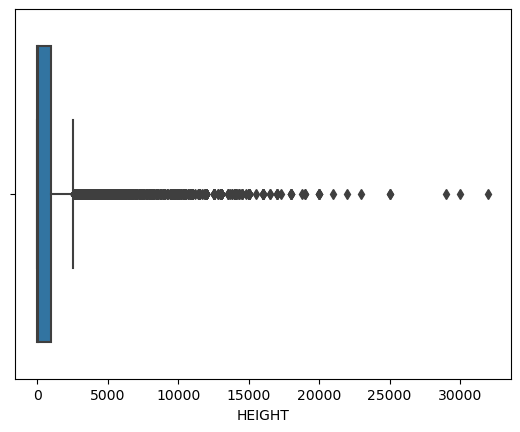

In [36]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x=df['HEIGHT'])

Well... that's a bit messy. The top 25% of values are above 1000 feet and spread all the way over 30,000 feet. The bottom 25% of values are extremely compressed though at 0 feet, as well as all the outliers. Is that true? Let's get those exact numbers. Let's also drop the NA's here because they will not provide value and distract from the values we do have. While unreported values can be problematic, let's determine it is okay to remove them. 

In [38]:
from numpy import percentile

q25 = percentile(df["HEIGHT"].dropna(), 25)
q75 = percentile(df["HEIGHT"].dropna(), 75)

q25, q75

(0.0, 1000.0)

So the bottom 25% of values are indeed at ground level, 0 feet. As a matter of fact, 44% of recorded `HEIGHT` values happen at ground level. We can calculate that like this:

In [40]:
sum(df["HEIGHT"] == 0) / df["HEIGHT"].dropna().shape[0]

0.44097106195281693

This might make sense as birds tend to hang around near the ground where food, nests, water, resting spots, and other habitat essentials are.

Let's do the same proportion for at least 1000 feet. Sure enough, 26% of values are above 1000 feet. 

In [42]:
sum(df["HEIGHT"] >= 1000) / df["HEIGHT"].dropna().shape[0]

0.2634832587048052

So what could we consider outliers? Let's try any values exceeding $ Q1 \pm 1.5 \times \text{IQR} $. That `1.5` would serve as the starting `k` value, and we can increase it for a higher outlier threshold if needed (e.g. we are getting "too many" outliers). 

In [44]:
iqr = q75 - q25
k = 1.5
cut_off = iqr * k
lower = q25 - cut_off
upper = q75 + cut_off

outliers = df[(df['HEIGHT'] < lower) | (df['HEIGHT'] > upper)]

with pd.option_context('display.max_columns', None):
    display(outliers)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708315,7,AAY,ALLEGIANT AIR,MD-80,A,4.0,2.0,D,2015-09-02,2015,9,NaN,NaT,KTPA,TAMPA INTL,FL,NaN,NaN,27.975470,27.975470,6000.0,NaN,NaN,Approach,M?,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
708327,18,NKS,SPIRIT AIRLINES,A-319,A,4.0,2.0,D,2015-05-10,2015,5,NaN,NaT,KORD,CHICAGO O'HARE INTL ARPT,IL,NaN,NaN,41.979600,41.979600,12000.0,NaN,NaN,Climb,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Precautionary Landing,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
708344,34,BUS,BUSINESS,DHC8 DASH 8,A,3.0,2.0,C,2015-05-13,2015,5,NaN,NaT,KROA,ROANOKE REGNL ARPT/WOODRUM FIELD,VA,NaN,NaN,37.325470,37.325470,3000.0,NaN,10.0,Approach,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
708367,56,AAL,AMERICAN AIRLINES,A-321,A,4.0,2.0,D,2015-05-22,2015,5,NaN,NaT,KPIT,PITTSBURGH INTL ARPT,PA,NaN,NaN,40.491470,40.491470,6000.0,NaN,NaN,Approach,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
708376,65,JIA,PSA AIRLINES,CRJ700,A,4.0,2.0,D,2015-05-26,2015,5,NaN,NaT,KYIP,WILLOW RUN ARPT,MI,NaN,NaN,42.237930,42.237930,3000.0,NaN,6.0,Approach,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,UNKBL,Unknown bird - large,Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516323,141023,FDX,FEDEX EXPRESS,MD-11,A,4.0,3.0,D,2024-03-15,2024,3,Night,0 days 22:00:00,KMSY,LOUIE ARMSTRONG NEW ORLEANS INTL ARPT,LA,11,NaN,29.993390,29.993390,5000.0,250.0,2.0,Climb,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKBS,Unknown bird - small,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1516429,141044,HAL,HAWAIIAN AIR,A-330,A,4.0,2.0,D,2024-03-16,2024,3,Night,0 days 21:00:00,KSAN,SAN DIEGO INTL,CA,27,NaN,32.733560,32.733560,4000.0,210.0,15.0,Approach,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1516433,141046,BUS,BUSINESS,DIAMOND DA42 TWIN STAR,A,1.0,2.0,C,2024-03-16,2024,3,Night,0 days 22:45:00,ZZZZ,UNKNOWN,NaN,NaN,Between KRWI and KJNX,NaN,NaN,3300.0,160.0,NaN,En Route,M?,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBS,Unknown bird - small,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,True


We cannot say it is helpful to detect outliers in the lower direction, given how 0's dominate anything below the 44th percentile so they are not really outliers. But the upper direction might be useful, so let's just focus in that direction. Let's increase the `k` value to `10` because we really want to raise the threshold to see truly fringe values. 

In [46]:
iqr = q75 - q25
k = 10
cut_off = iqr * k
upper = q75 + cut_off

outliers = df[(df['HEIGHT'] > upper)]

with pd.option_context('display.max_columns', None):
    display(outliers)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
708327,18,NKS,SPIRIT AIRLINES,A-319,A,4.0,2.0,D,2015-05-10,2015,5,NaN,NaT,KORD,CHICAGO O'HARE INTL ARPT,IL,NaN,NaN,41.97960,41.97960,12000.0,NaN,NaN,Climb,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Precautionary Landing,NaN,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
765592,1221,SWA,SOUTHWEST AIRLINES,B-737-700,A,4.0,2.0,D,2015-02-26,2015,2,NaN,NaT,KSAN,SAN DIEGO INTL,CA,27,NaN,32.73356,32.73356,12000.0,280.0,90.0,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBS,Unknown bird - small,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
765903,1502,FDX,FEDEX EXPRESS,B-757-200,A,4.0,2.0,D,2015-03-25,2015,3,Night,0 days 06:05:00,KMDT,HARRISBURG INTL,PA,13,NaN,40.19350,40.19350,25000.0,325.0,75.0,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
766903,2416,AAL,AMERICAN AIRLINES,B-737-800,A,4.0,2.0,D,2015-04-30,2015,4,Night,0 days 23:15:00,KLAX,LOS ANGELES INTL,CA,25L,NaN,33.94254,33.94254,12000.0,280.0,45.0,Descent,N,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,Y,Perching birds (y),Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
768909,4287,SWA,SOUTHWEST AIRLINES,B-737-300,A,4.0,2.0,D,2015-06-17,2015,6,Day,0 days 08:05:00,KATL,HARTSFIELD - JACKSON ATLANTA INTL ARPT,GA,27R,NaN,33.64044,33.64044,12500.0,280.0,25.0,Climb,N,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKBM,Unknown bird - medium,Medium,False,NaN,50.0,NaN,64.0,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510595,138389,SWA,SOUTHWEST AIRLINES,B-737-7,A,4.0,2.0,D,2023-05-09,2023,5,Day,0 days 17:30:00,KRNO,RENO TAHOE INTL,NV,17L,NaN,39.49858,39.49858,12000.0,NaN,15.0,Descent,M?,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,K3206,Golden eagle,Large,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1510722,138491,SWA,SOUTHWEST AIRLINES,B-737-7,A,4.0,2.0,D,2016-05-27,2016,5,Night,0 days 23:40:00,KPHX,PHOENIX SKY HARBOR INTL ARPT,AZ,25R,NaN,33.43417,33.43417,11500.0,210.0,NaN,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKBM,Unknown bird - medium,Medium,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1511105,138706,UAL,UNITED AIRLINES,B-737-800,A,4.0,2.0,D,2024-01-06,2024,1,Day,0 days 16:14:00,KBMG,MONROE COUNTY,IN,35,NaN,39.14602,39.14602,14000.0,190.0,NaN,Climb,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,NaN,NaN,NaN,Y,Perching birds (y),Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


With such a crazy high treshhold, we get 219 outliers. Browsing the data there seems to be a lot of heavy airliners flown by UNITED AIRLINES and SOUTHWEST AIRLINES. At risk of going into bivariate analysis, let's take a look at the `AIRCRAFT` in these outliers to test this theory. 

In [48]:
outliers["AIRCRAFT"].value_counts(dropna=False)

AIRCRAFT
B-737-700                   23
B-737-800                   22
A-320                       18
A-321                       17
EMB-170                     14
B-767-300                   13
A-319                        9
B-757-200                    9
B-737-7                      7
EMB-145                      7
CRJ100/200                   7
CRJ900                       7
A-300                        6
DHC8 DASH 8                  5
B-767-200                    5
B-737-8                      5
CRJ700                       4
B-737-900                    4
CL-300                       3
EMB-500 PHENOM 100           2
B-717-200                    2
A-330                        2
B-747-8 SERIES               2
RKWL TURBO COMMANDER 690     1
LEARJET-35                   1
CITATION EXL                 1
BE-350 SUPER KING            1
B-737-300                    1
DASSAULT-900                 1
EMB-135                      1
CITATIONJET                  1
B-777                        1

Okay, interesting... or maybe not! Airlines fly large aircraft like the 737-800 really high and quite frequently. And where there is more frequency, there is more opportunity to observe outliers like aircraft hitting birds at higher altitudes. Perhaps the [Law of Truly Large Numbers](https://en.wikipedia.org/wiki/Law_of_truly_large_numbers) is playing a role here `¯\_(ツ)_/¯`.

## Standard Deviation Outliers

Since our `SPEED` variable seems to follow a normal distribution, we can detect outliers using standard deviations. 

Let's create another boxplot. 

<Axes: xlabel='SPEED'>

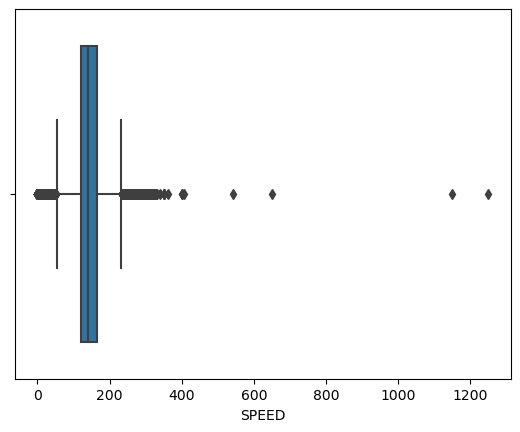

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x=df['SPEED'])

Okay, that's fairly balanced. There are a few outliers on the right side but not many of them. Let's bring our attention to that right direction, specifically values greater than 3 standard deviations from the mean. 

In [52]:
speed_mean = df["SPEED"].mean()
speed_std = df["SPEED"].std()
outliers = df[df["SPEED"] > (speed_mean+speed_std*3)]

with pd.option_context('display.max_columns', None):
    display(outliers)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
765165,831,UAL,UNITED AIRLINES,B-737-800,A,4.0,2.0,D,2015-01-03,2015,1,Day,0 days 15:30:00,KIAH,GEORGE BUSH INTERCONTINENTAL/ HOUSTON ARPT,TX,NaN,NaN,29.980470,29.980470,1500.0,300.0,NaN,Climb,N,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,YI005,Barn swallow,Small,True,NaN,NaN,NaN,NaN,NaN,NaN,False
765903,1502,FDX,FEDEX EXPRESS,B-757-200,A,4.0,2.0,D,2015-03-25,2015,3,Night,0 days 06:05:00,KMDT,HARRISBURG INTL,PA,13,NaN,40.193500,40.193500,25000.0,325.0,75.0,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,UNKB,Unknown bird,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
766551,2093,GOV,GOVERNMENT,LEARJET-60,A,2.0,2.0,D,2015-04-21,2015,4,NaN,NaT,ZZZZ,UNKNOWN,NaN,NaN,OVER KPSP,NaN,NaN,10000.0,300.0,NaN,En Route,M,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,Y,Perching birds (y),Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
767721,3172,UPS,UPS AIRLINES,B-767-300,A,4.0,2.0,D,2015-05-15,2015,5,Night,0 days 23:40:00,RPLC,CLARK INTL,FN,20L,NaN,15.185833,15.185833,10500.0,290.0,45.0,Climb,M,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,NaN,NaN,UNKBL,Unknown bird - large,Large,False,NaN,NaN,NaN,NaN,NaN,NaN,True
771157,6427,GJS,GOJET AIRLINES,CRJ700,A,4.0,2.0,D,2015-07-31,2015,7,Day,0 days 10:25:00,KLGA,LA GUARDIA ARPT,NY,31,NaN,40.777240,40.777240,10000.0,290.0,NaN,Descent,M,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,N5105,Black-bellied plover,Small,True,8000.0,NaN,10272.0,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482128,131012,AAL,AMERICAN AIRLINES,A-321,A,4.0,2.0,D,2023-10-19,2023,10,Night,0 days 22:05:00,KDFW,DALLAS/FORT WORTH INTL ARPT,TX,35C,NaN,32.895950,32.895950,11000.0,300.0,25.0,Climb,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKB,Unknown bird,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1504657,135494,SWA,SOUTHWEST AIRLINES,B-737-7,A,4.0,2.0,D,2015-08-04,2015,8,Night,0 days 01:30:00,KTUL,TULSA INTL,OK,18L,NaN,36.198370,36.198370,10000.0,300.0,NaN,Descent,N,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,Y9016,Least flycatcher,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1504923,135646,SWA,SOUTHWEST AIRLINES,B-737-7,A,4.0,2.0,D,2019-09-18,2019,9,Day,0 days 22:11:00,KMCI,KANSAS CITY INTL,MO,NaN,NaN,39.297610,39.297610,14000.0,290.0,30.0,Climb,N,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKB,Unknown bird,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,False


This leaves us with 129 records. We will explore this in relationship with other variables, like the aircraft type and the carrier, in the next section. Let's next look in the opposite direction, but there's one problem: 3 standard deviations to the left of the mean is negative, and we do not have recorded negative speeds. 

In [54]:
print(speed_mean-speed_std*3)

-0.4824978267604365


Let's dial it back to 2.5 standard deviations. 

In [56]:
print(speed_mean-speed_std*2.5)

23.690863478839475


In [60]:
outliers = df[df["SPEED"] < (speed_mean-speed_std*2.9)]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(outliers)

,Unnamed: 0,OPID,OPERATOR,AIRCRAFT,AC_CLASS,AC_MASS,NUM_ENGS,TYPE_ENG,INCIDENT_DATE,INCIDENT_YEAR,INCIDENT_MONTH,TIME_OF_DAY,TIME,AIRPORT_ID,AIRPORT,STATE,RUNWAY,LOCATION,LATITUDE,LONGITUDE,HEIGHT,SPEED,DISTANCE,PHASE_OF_FLIGHT,DAMAGE_LEVEL,STR_RAD,DAM_RAD,STR_WINDSHLD,DAM_WINDSHLD,STR_NOSE,STR_PROP,DAM_PROP,STR_WING_ROT,DAM_WING_ROT,STR_FUSE,DAM_FUSE,STR_LG,DAM_LG,STR_TAIL,DAM_TAIL,STR_LGHTS,DAM_LGHTS,STR_OTHER,EFFECT,SKY,PRECIPITATION,SPECIES_ID,SPECIES,SIZE,WARNED,COST_REPAIRS,COST_OTHER,COST_REPAIRS_INFL_ADJ,COST_OTHER_INFL_ADJ,NR_INJURIES,NR_FATALITIES,INDICATED_DAMAGE
INDEX_NR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
778484,13068,BUS,BUSINESS,SIKORSKY,B,NaN,NaN,NaN,2016-01-29,2016,1,Day,0 days 15:00:00,KSUA,WITHAM FIELD ARPT,FL,NaN,NaN,43.984370,43.984370,10.0,3.0,0.0,Taxi,N,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,Precautionary Landing,No Cloud,NaN,I1301,Cattle egret,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
806595,35049,BUS,BUSINESS,PA-28,A,1.0,1.0,A,2017-06-02,2017,6,Day,0 days 05:24:00,KFFZ,FALCON FIELD ARPT,AZ,TXY D,NaN,33.460830,33.460830,0.0,3.0,0.0,Taxi,N,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBS,Unknown bird - small,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
806975,35322,NKS,SPIRIT AIRLINES,A-319,A,4.0,2.0,D,2017-07-15,2017,7,Dusk,0 days 19:45:00,KIAG,NIAGARA FALLS INTL,NY,28R,NaN,43.107260,43.107260,0.0,4.0,0.0,Take-off Run,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,Some Cloud,NaN,YH004,Horned lark,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
934847,54553,BVN,BARON AVIATION SERVICES,C-208,A,2.0,1.0,C,2019-08-28,2019,8,Night,0 days 23:15:00,KHSV,HUNTSVILLE INTL ARPT-CARL T JONES FIELD,AL,NaN,NaN,34.640450,34.640450,0.0,2.0,0.0,Taxi,N,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,UNKBS,Unknown bird - small,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
988257,60783,DAL,DELTA AIR LINES,B-757-300,A,4.0,2.0,D,2020-03-24,2020,3,Day,0 days 09:55:00,KRSW,SOUTHWEST FLORIDA INTL ARPT,FL,6,NaN,26.536170,26.536170,0.0,0.0,0.0,Parked,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,O2205,Mourning dove,Small,True,NaN,NaN,NaN,NaN,NaN,NaN,False
1022069,65862,BUS,BUSINESS,PA-34 SENECA,A,1.0,2.0,A,2020-01-26,2020,1,Day,0 days 01:45:00,KSRQ,SARASOTA-BRADENTON INTL ARPT,FL,14,NaN,27.395330,27.395330,0.0,0.0,0.0,Parked,N,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,I1301,Cattle egret,Small,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1033970,66371,USCBP,US CUSTOMS AND BORDER PROTECTION,EC120,B,1.0,1.0,F,2016-09-13,2016,9,Night,0 days 20:46:00,P10,POLACCA ARPT,AZ,NaN,NaN,35.791670,35.791670,5.0,1.0,0.0,Approach,N,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,NaN,Some Cloud,NaN,S5211,Lesser nighthawk,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1034552,66643,BUS,BUSINESS,PA-28,A,1.0,1.0,A,2020-06-07,2020,6,Day,0 days 08:33:00,KCHD,CHANDLER MUNICIPAL ARPT,AZ,NaN,NaN,33.269080,33.269080,0.0,0.0,0.0,Parked,N,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,NaN,No Cloud,NaN,O2111,Rock pigeon,Small,False,NaN,NaN,NaN,NaN,NaN,NaN,False
1088186,74193,AUA,AUSTRIAN AIRLINES,B-767-300,A,4.0,2.0,D,2020-10-25,2020,10,Day,0 days 17:58:00,KORD,CHICAGO O'HARE INTL ARPT,IL,NaN,NaN,41.979600,41.979600,0.0,0.0,0.0,Parked,N,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN,NaN,NaN,O2205,Mourning dove,Small,True,NaN,NaN,NaN,NaN,NaN,NaN,False


Huh, a lot of these aircraft going so slow they were captured as outliers seem to be on the ground. Makes sense. We'll save that bivariate analysis for the next section for that deep dive. 

## EXERCISE

Explore the `DISTANCE` (which is nautical miles from the airport) and `AC_CLASS` variables. What can you observe about each of them? 

For context, `AC_CLASS` is decoded in the following table: 

| Aircraft Code | Aircraft Classification |
|---------------|-------------------------|
| A             | Airplane                |
| B             | Helicopter              |
| C             | Glider                  |
| D             | Balloon                 |
| F             | Dirigible               |
| I             | Gyroplane               |
| J             | Ultralight              |
| Y             | Other                   |
| Z             | Unknown                 |

In [ ]:
# PUT CODE HERE 



### SCROLL DOWN FOR ANSWER
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
|<br>
v 

Using a histogram and KDE plot, we can see that bird strikes skew heavily near the airport. 

<Axes: >

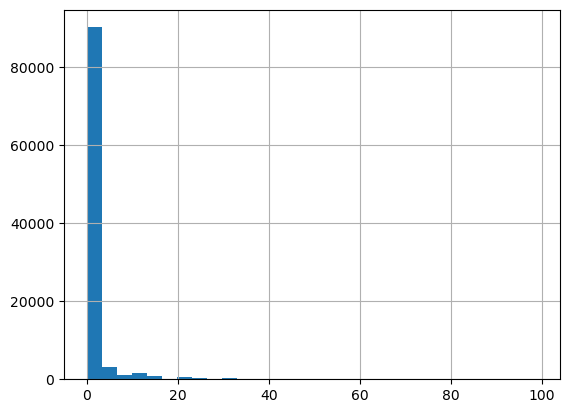

In [62]:
df["DISTANCE"].hist(bins=30)

<Axes: ylabel='Density'>

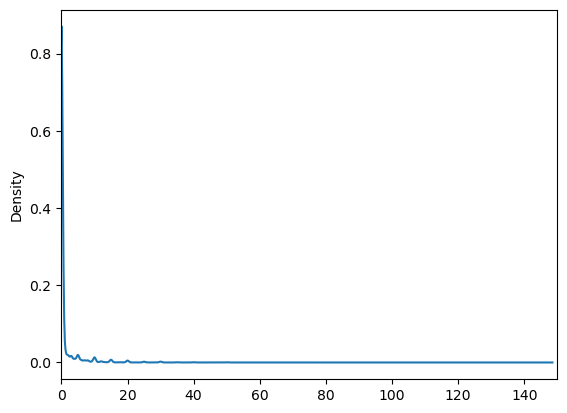

In [64]:
df["DISTANCE"].plot.kde(xlim=(0,150))

With `AC_CLASS`, bird strikes happen overwhelmingly to planes (class `A`) followed by helicopters (class `B`). This makes sense as gliders and ultralight aircraft are probably less common, rather than because aircraft and helicopters are more vulnerable to bird strikes.

<Axes: xlabel='AC_CLASS'>

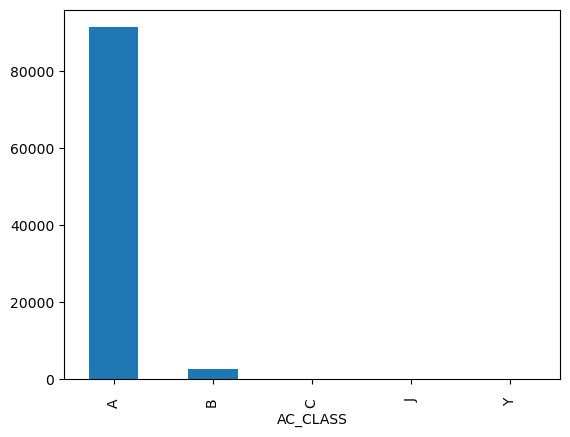

In [66]:
df["AC_CLASS"].value_counts().plot.bar()